<a href="https://colab.research.google.com/github/SergeyAnufriev/CFD_unet/blob/main/notebooks/Mesh_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/CFD_unet
!git clone https://github.com/SergeyAnufriev/CFD_unet.git

Cloning into 'CFD_unet'...
remote: Enumerating objects: 578, done.
remote: Counting objects: 100% (578/578), done.
remote: Compressing objects: 100% (409/409), done.
remote: Total 578 (delta 220), reused 507 (delta 161), pack-reused 0
Receiving objects: 100% (578/578), 85.22 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (220/220), done.
Checking out files: 100% (305/305), done.


#This notebook investigates CFD simulation data


In [30]:
import pandas as pd
import glob
import sys 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/content/CFD_unet')

In [4]:
files_c = glob.glob(r'/content/CFD_unet/dataset/*_c.txt')
files_n = glob.glob(r'/content/CFD_unet/dataset/*_n.txt')

In [16]:
len(files_n), len(files_c)

(99, 99)

In [5]:
def read_file_n(dir_):
  df = pd.read_csv(dir_,sep =' ',header=None)
  df = df.drop(labels=list(range(1, 15, 2)),axis=1)
  df.columns = ['node_num','node_type','x','y','P','u_x','u_y','cav']
  df = df.astype({"P": float, "cav": float})

  return df


In [6]:
df = read_file_n(files_n[17])

In [10]:
df.head(10)

,node_num,node_type,x,y,P,u_x,u_y,cav
0,0,2,0.115,0.000182,11737.2,0.00000,0.000000,1.0
1,1,1,0.500,0.250000,11698.4,1.97779,0.160467,1.0
2,2,1,0.500,-0.250000,11699.0,1.99592,0.177322,1.0
3,3,3,-0.500,-0.250000,11701.4,1.99214,0.177130,1.0
4,4,3,-0.500,0.250000,11661.1,1.99218,0.177168,1.0
5,10,1,0.500,0.230000,11698.4,1.97826,0.160503,1.0
6,11,1,0.500,0.210000,11698.4,1.97941,0.160595,1.0
7,12,1,0.500,0.190000,11698.4,1.98070,0.160699,1.0
8,13,1,0.500,0.170000,11698.4,1.98172,0.160833,1.0
9,14,1,0.500,0.150000,11698.4,1.98272,0.161022,1.0


In [11]:
len(df)

7420

In [78]:
df['P'].value_counts()

15355.1    30
15355.0    14
15368.3    11
15330.1    10
15357.4    10
           ..
15318.3     1
15438.0     1
14475.3     1
15333.5     1
15431.6     1
Name: P, Length: 4312, dtype: int64

In [79]:
len(df)

7420

Text(0.5, 1.0, 'u_y')

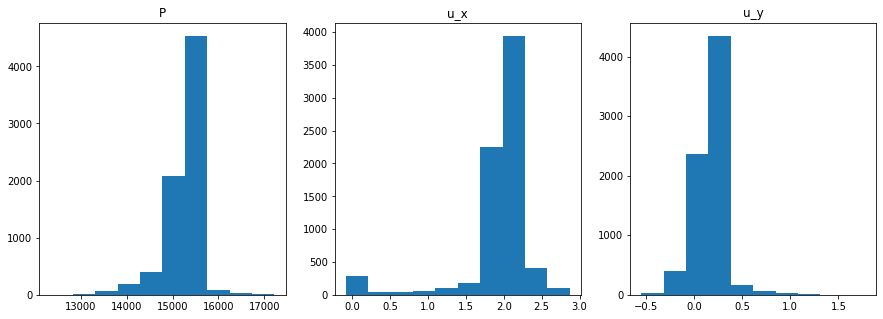

In [67]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

axs[0].hist(df['P'].values)
axs[0].set_title('P')
axs[1].hist(df['u_x'].values)
axs[1].set_title('u_x')
axs[2].hist(df['u_y'].values)
axs[2].set_title('u_y')

In [82]:
def check_repeat_val(x:str)->int:
  '''Function checks the number of files with repeting values'''
  
  count = 0
  for file_ in files_n:
    df = read_file_n(file_)
    if len(df[x].value_counts()) <2000:
      count+=1

  return count

In [83]:
### all files do not have repeating values

check_repeat_val('P'), check_repeat_val('u_x'),check_repeat_val('u_y')

(0, 0, 0)

In [49]:
P_min   = [read_file_n(x)['P'].min() for x in files_n]
P_max   = [read_file_n(x)['P'].max() for x in files_n]
P_mean  = [read_file_n(x)['P'].mean() for x in files_n]

u_x_min  = [read_file_n(x)['u_x'].min() for x in files_n]
u_x_max  = [read_file_n(x)['u_x'].max() for x in files_n]
u_x_mean = [read_file_n(x)['u_x'].mean() for x in files_n]

u_y_min  = [read_file_n(x)['u_y'].min() for x in files_n]
u_y_max  = [read_file_n(x)['u_y'].max() for x in files_n]
u_y_mean = [read_file_n(x)['u_y'].mean() for x in files_n]

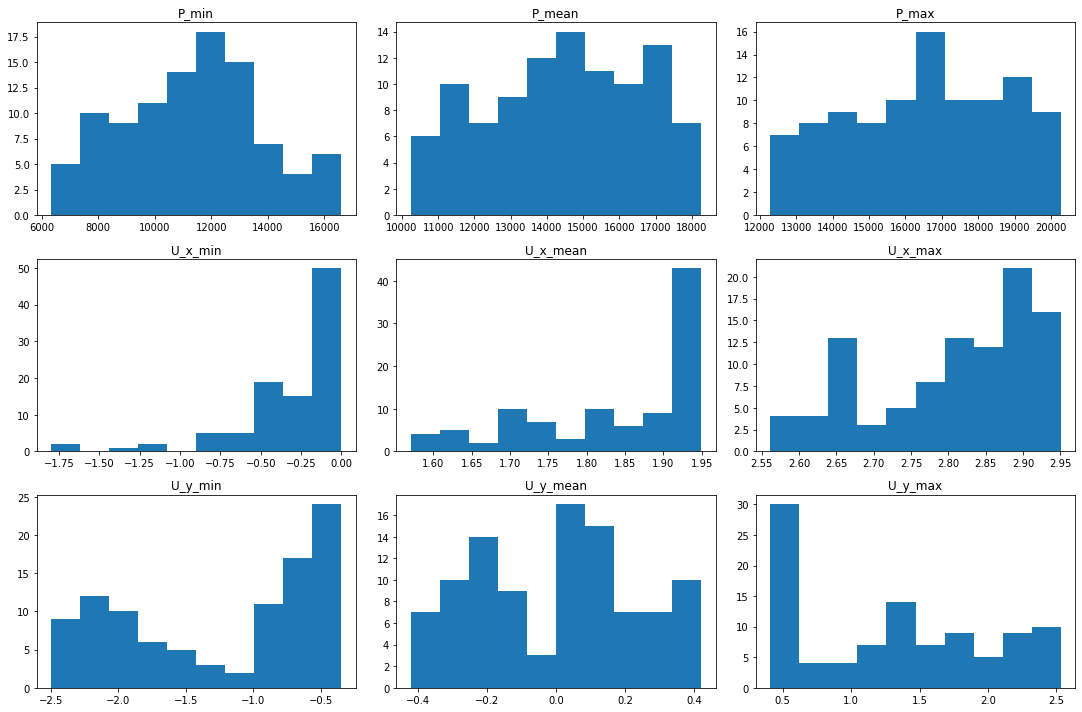

In [60]:
fig, axs = plt.subplots(3, 3,figsize=(15,10))


axs[0,0].hist(P_min)
axs[0, 0].set_title('P_min')
axs[0,1].hist(P_mean)
axs[0, 1].set_title('P_mean')
axs[0,2].hist(P_max)
axs[0, 2].set_title('P_max')

axs[1,0].hist(u_x_min)
axs[1, 0].set_title('U_x_min')
axs[1,1].hist(u_x_mean)
axs[1, 1].set_title('U_x_mean')
axs[1,2].hist(u_x_max)
axs[1, 2].set_title('U_x_max')

axs[2,0].hist(u_y_min)
axs[2, 0].set_title('U_y_min')
axs[2,1].hist(u_y_mean)
axs[2, 1].set_title('U_y_mean')
axs[2,2].hist(u_y_max)
axs[2, 2].set_title('U_y_max')

plt.tight_layout()

In [84]:
# Install required packages.
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


     |████████████████████████████████| 7.9 MB 5.7 MB/s 
     |████████████████████████████████| 3.5 MB 5.3 MB/s 


In [92]:
from torch_geometric.data import DataLoader
from data_ import dataset_graph_,velocities_cav

In [87]:
dir_    = r'/content/CFD_unet/dataset/*txt'
dataset = dataset_graph_(dir_)

In [90]:
len(dataset)

99

In [98]:
import torch

In [101]:
def velocities_cav(dir):
    '''Input file name:
    Output: u_x,u_y,cav'''
    data = dir.split('\\')[-1].split('_')
    u_x  = float(data[1])/100
    u_y  = float(data[2])/100
    cav  = float(data[-2])/100

    return torch.tensor([u_x,u_y,cav],dtype=torch.float32)

In [94]:
import glob

In [95]:
files = glob.glob(dir_)

In [102]:
velocities_cav(files[0])

ValueError: ignored

In [91]:
dir1 = '67e334_198_-21_14936_626_-61_n.txt'


In [93]:
velocities_cav(dir1)

tensor([ 1.9800, -0.2100, -0.6100])

In [89]:
graph ,X_out  = dataset.get(10)

X_feat  = graph.x[:,:2]
pos_    =  {x:(float(X_feat[x,0].numpy()),float(X_feat[x,1].numpy())) for x in range(len(X_feat))}

ValueError: ignored